In [1]:
# Computing the halo shape of the MW in presence of the LMC

In [2]:
%pylab inline
import jellyfish
import sys
sys.path.append('../')
import reading_snapshots
import pygadgetreader

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/lib/python3.5/dist-packages/Jellyfish-0.1.0-py3.5.egg/jellyfish/orbit.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    a

In [47]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
MW_post = reading_snapshots.read_MW_snap_com_coordinates('../../../MW_anisotropy/code/test_snaps/', 'MWLMC5_100M_new_b1_110', LMC=True,
                                                                 N_halo_part=100000000, pot=True)

Reading host  snapshot
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Host disk com: [ 9.19391488 42.1269949  -3.31300547] [ 10.34109411  28.95649597 -39.88921287]
Returning DM    Potential
Loading MW particles and LMC particles


In [4]:
MW_pos = pygadgetreader.readsnap('../../../MW_anisotropy/code/test_snaps/MW2_100M_beta1_vir_017', 'pos', 'dm')

Returning DM    Positions


In [5]:
MWLMC_pos = pygadgetreader.readsnap('../../../MW_anisotropy/code/test_snaps/MWLMC5_100M_new_b1_110', 'pos', 'dm')

Returning DM    Positions


In [6]:
len(MWLMC_pos)

115000000

# Halo shape of the MW without the LMC:


In [7]:
data_MW = np.loadtxt('../MW/MW_100M_b1_dm_part_1e6.txt')

In [262]:
rand_particles_1e6 = np.random.randint(0, 100000000, 10000000)

In [263]:
pos_MW = MW_pos[rand_particles_1e6]

In [10]:
r_s_mw = np.arange(20, 300, 5)
s_s_mw = np.zeros(len(r_s_mw))
q_s_mw = np.zeros(len(r_s_mw))

s_v_mw = np.zeros(len(r_s_mw))
q_v_mw = np.zeros(len(r_s_mw))

vec_s_mw = np.zeros((len(r_s_mw), 3, 3))
vec_v_mw = np.zeros((len(r_s_mw), 3, 3))
j = 0

for i in r_s_mw:
    vec_s_mw[j], s_s_mw[j], q_s_mw[j] = jellyfish.shapes.iterate_shell(pos_MW, i, 5, 1E-2)
    vec_v_mw[j], s_v_mw[j], q_v_mw[j] = jellyfish.shapes.iterate_volume(pos_MW, i, 1E-2)
    j+=1

(0.9, 1.0)

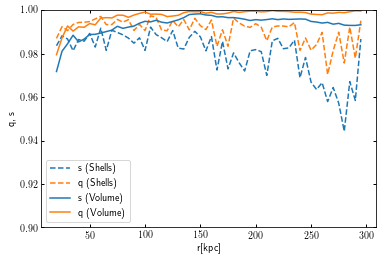

In [43]:
plot(r_s_mw, s_s_mw, c='C0', ls='--', label='s (Shells)')
plot(r_s_mw, q_s_mw, c='C1', ls='--', label='q (Shells)')
plot(r_s_mw, s_v_mw, c='C0', label='s (Volume)')
plot(r_s_mw, q_v_mw, C='C1', label='q (Volume)')
xlabel('r[kpc]')
ylabel('q, s')
legend()
ylim(0.9, 1.0)

# Halo shape MW halo in the presence of the LMC using only MW DM particles

In [264]:
#data_MWLMC = np.loadtxt('../MWLMC/MWLMC_100M_b1_dm_part_1e6_500.txt')
data_MWLMC = MW_post[0]

In [265]:
data_MWLMC = data_MWLMC[rand_particles_1e6]

In [ ]:
dr = 5
r_s_mwlmc = np.arange(20, 300, dr)
s_s_mwlmc = np.zeros(len(r_s_mwlmc))
q_s_mwlmc = np.zeros(len(r_s_mwlmc))

s_v_mwlmc = np.zeros(len(r_s_mwlmc))
q_v_mwlmc = np.zeros(len(r_s_mwlmc)) 

vec_s_mwlmc = np.zeros((len(r_s_mwlmc), 3, 3))
vec_v_mwlmc = np.zeros((len(r_s_mwlmc), 3, 3))
j = 0

for i in r_s_mwlmc:
    vec_s_mwlmc[j], s_s_mwlmc[j], q_s_mwlmc[j] = jellyfish.shapes.iterate_shell(data_MWLMC, i, dr, 1E-2)
    vec_v_mwlmc[j], s_v_mwlmc[j], q_v_mwlmc[j] = jellyfish.shapes.iterate_volume(data_MWLMC, i, 1E-2)
    j+=1

In [ ]:
plot(r_s_mwlmc, s_s_mwlmc, c='C0', ls='--', label='s (Shells)')
plot(r_s_mwlmc, q_s_mwlmc, c='C1', ls='--', label='q (Shells)')
plot(r_s_mwlmc, s_v_mwlmc, c='C0', label='s (Volume)')
plot(r_s_mwlmc, q_v_mwlmc, c='C1', label='q (Volume)')
xlabel('r[kpc]')
ylabel('q, s')
legend()
ylim(0.9, 1)

(0.9, 1.0)

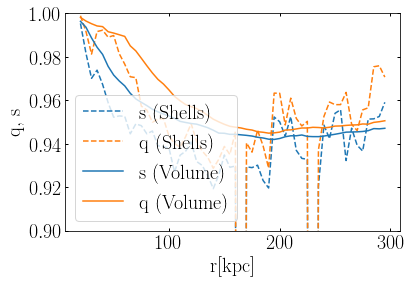

In [85]:
plot(r_s_mwlmc, s_s_mwlmc, c='C0', ls='--', label='s (Shells)')
plot(r_s_mwlmc, q_s_mwlmc, c='C1', ls='--', label='q (Shells)')
plot(r_s_mwlmc, s_v_mwlmc, c='C0', label='s (Volume)')
plot(r_s_mwlmc, q_v_mwlmc, c='C1', label='q (Volume)')
xlabel('r[kpc]')
ylabel('q, s')
legend()
ylim(0.9, 1.0)

(0.9, 1)

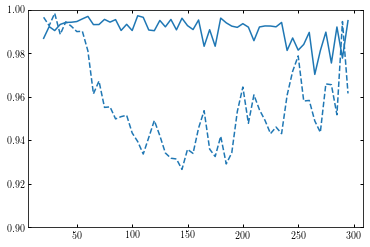

In [17]:
plot(r_s_mwlmc, q_s_mwlmc, c='C0', ls='--', label='s (Shells)')
plot(r_s_mw, q_s_mw, c='C0', ls='-', label='s (Shells)')
ylim(0.9, 1)

(0.9, 1)

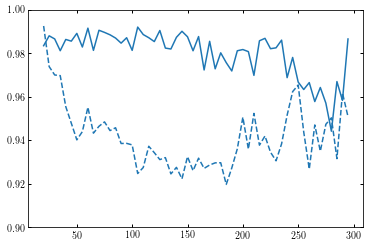

In [18]:
plot(r_s_mwlmc, s_s_mwlmc, c='C0', ls='--', label='s (Shells)')
plot(r_s_mw, s_s_mw, c='C0', ls='-', label='s (Shells)')
ylim(0.9, 1)

In [19]:
vec_s_mwlmc[10]

array([[ 0.25775929,  0.96537985, -0.04002371],
       [-0.53649999,  0.17745213,  0.82503243],
       [ 0.80357197, -0.19118705,  0.56366621]])

In [38]:
vec_s_mw[10]

array([[ 0.15102598,  0.9342366 , -0.32309926],
       [-0.11814116,  0.34156376,  0.93240381],
       [ 0.98144476, -0.10264588,  0.1619568 ]])

# Halo shape of the MW and the LMC using both particles

In [20]:
rand_particles_1e6_mwlmc = np.random.randint(0, 115000000, 1000000)

In [21]:
MWLMC_pos = MWLMC_pos[rand_particles_1e6_mwlmc]

In [86]:
dr = 5
r_s_mwlmc_all = np.arange(20, 300, dr)
s_s_mwlmc_all = np.zeros(len(r_s_mwlmc_all))
q_s_mwlmc_all = np.zeros(len(r_s_mwlmc_all))

s_v_mwlmc_all = np.zeros(len(r_s_mwlmc_all))
q_v_mwlmc_all = np.zeros(len(r_s_mwlmc_all)) 

vec_s_mwlmc_all = np.zeros((len(r_s_mwlmc_all), 3, 3))
vec_v_mwlmc_all = np.zeros((len(r_s_mwlmc_all), 3, 3))
j = 0

for i in r_s_mwlmc_all:
    vec_s_mwlmc_all[j], s_s_mwlmc_all[j], q_s_mwlmc_all[j] = jellyfish.shapes.iterate_shell(MWLMC_pos, i, dr, 1E-2)
    vec_v_mwlmc_all[j], s_v_mwlmc_all[j], q_v_mwlmc_all[j] = jellyfish.shapes.iterate_volume(MWLMC_pos, i, 1E-2)
    j+=1

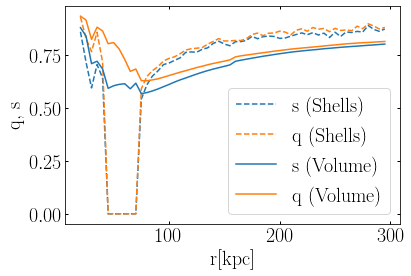

In [102]:

plot(r_s_mwlmc_all, s_s_mwlmc_all, c='C0', ls='--', label='s (Shells)')
plot(r_s_mwlmc_all, q_s_mwlmc_all, c='C1', ls='--', label='q (Shells)')
plot(r_s_mwlmc_all, s_v_mwlmc_all, c='C0', label='s (Volume)')
plot(r_s_mwlmc_all, q_v_mwlmc_all, c='C1', label='q (Volume)')
xlabel('r[kpc]')
ylabel('q, s')
legend()
#ylim(0.9, 1)

In [24]:
T_mwlmc_all_s = (1-q_s_mwlmc_all**2)/(1-s_s_mwlmc_all**2)
T_mwlmc_all_v = (1-q_v_mwlmc_all**2)/(1-s_v_mwlmc_all**2)

In [25]:
T_mwlmc_s = (1-q_s_mwlmc**2)/(1-s_s_mwlmc**2)
T_mwlmc_v = (1-q_v_mwlmc**2)/(1-s_v_mwlmc**2)

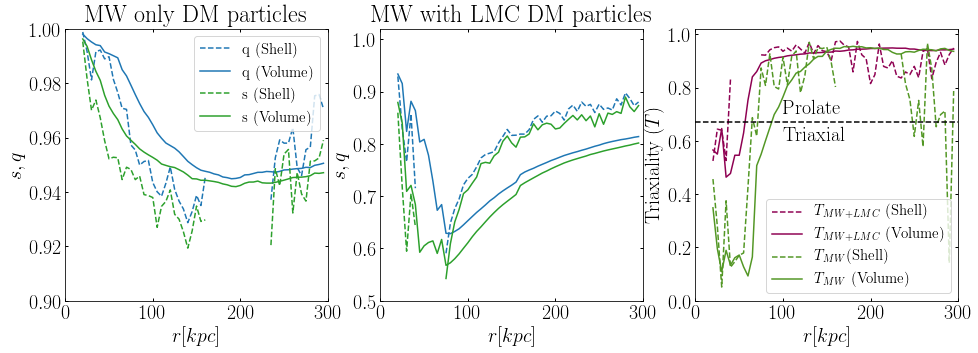

In [192]:
fig, ax = subplots(1, 3, figsize=(16, 5))

zero_s_mw_w = np.where(s_s_mwlmc==0)[0]
zero_q_mw_w = np.where(q_s_mwlmc==0)[0]

zero_s_mwlmc = np.where(s_s_mwlmc_all>0)[0]
zero_q_mwlmc = np.where(q_s_mwlmc_all>0)[0]

zero_s_mwlmc_w = np.where(s_s_mwlmc_all==0)[0]
zero_q_mwlmc_w = np.where(q_s_mwlmc_all==0)[0]

ax[0].set_title('MW only DM particles')
ax[0].plot(r_s_mwlmc[:zero_q_mw_w[0]], q_s_mwlmc[:zero_q_mw_w[0]], c='C0', label='q (Shell)', ls='--')
ax[0].plot(r_s_mwlmc[zero_q_mw_w[-1]+1:], q_s_mwlmc[zero_q_mw_w[-1]+1:], c='C0', ls='--')

ax[0].plot(r_s_mwlmc, q_v_mwlmc, c='C0', label='q (Volume)')
ax[0].plot(r_s_mwlmc[:zero_s_mw_w[0]], s_s_mwlmc[:zero_s_mw_w[0]], c='C2', label='s (Shell)', ls='--')
ax[0].plot(r_s_mwlmc[zero_s_mw_w[-1]+1:], s_s_mwlmc[zero_s_mw_w[-1]+1:], c='C2', ls='--')

ax[0].plot(r_s_mwlmc, s_v_mwlmc, c='C2', label='s (Volume)')
ax[0].set_ylim(0.9, 1.0)
ax[0].set_xlim(0, 300)
ax[0].set_xlabel(r'$r[kpc]$')
ax[0].set_ylabel('$s, q$')
ax[0].legend(fontsize=15)


ax[1].set_title('MW with LMC DM particles')
ax[1].plot(r_s_mwlmc_all[:zero_q_mwlmc_w[0]], q_s_mwlmc_all[:zero_q_mwlmc_w[0]], c='C0', label='q (Shell)', ls='--')
ax[1].plot(r_s_mwlmc_all[zero_q_mwlmc_w[-1]+1:], q_s_mwlmc_all[zero_q_mwlmc_w[-1]+1:], c='C0', ls='--')
ax[1].plot(r_s_mwlmc_all, q_v_mwlmc_all, c='C0', label='q (Volume)')

ax[1].plot(r_s_mwlmc_all, s_v_mwlmc_all, c='C2', label='s (Volume)')
ax[1].plot(r_s_mwlmc_all[:zero_s_mwlmc_w[0]], s_s_mwlmc_all[:zero_s_mwlmc_w[0]], c='C2', label='q (Shell)', ls='--')
ax[1].plot(r_s_mwlmc_all[zero_s_mwlmc_w[-1]+1:], s_s_mwlmc_all[zero_s_mwlmc_w[-1]+1:], c='C2')
ax[1].set_ylim(0.5, 1.02)
ax[1].set_xlim(0, 300)
ax[1].set_xlabel(r'$r[kpc]$')
ax[1].set_ylabel('$s, q$')


# Triaxiality 
ax[2].plot(r_s_mwlmc_all[:zero_s_mwlmc_w[0]], T_mwlmc_all_s[:zero_s_mwlmc_w[0]], c='#8e0152', label='$T_{MW+LMC}$ (Shell)', ls='--')
ax[2].plot(r_s_mwlmc_all[zero_s_mwlmc_w[-1]+1:], T_mwlmc_all_s[zero_s_mwlmc_w[-1]+1:], c='#8e0152', ls='--')

ax[2].plot(r_s_mwlmc_all, T_mwlmc_all_v, c='#8e0152', label='$T_{MW+LMC}$ (Volume)')

ax[2].plot(r_s_mwlmc[:zero_s_mw_w[0]], T_mwlmc_s[:zero_s_mw_w[0]], c='#539725', label='$T_{MW} $(Shell)', ls='--')
ax[2].plot(r_s_mwlmc[zero_s_mw_w[-1]+1:], T_mwlmc_s[zero_s_mw_w[-1]+1:], c='#539725', ls='--')

ax[2].plot(r_s_mwlmc, T_mwlmc_v, c='#539725', label='$T_{MW}$ (Volume)')

ax[2].legend(fontsize=15)
ax[2].text(100, 0.7, 'Prolate')
ax[2].text(100, 0.6, 'Triaxial')
ax[2].axhline(0.67, c='k', ls='--')
ax[2].set_ylabel('Triaxiality $(T)$')
ax[2].set_xlabel(r'$r[kpc]$')
ax[2].set_ylim(0, 1.02)
ax[2].set_xlim(0, 300)
#axhline(0.33)

savefig('MWLMC_halo_shape.pdf', bbox_inches='tight')

In [127]:
cmap = cm.get_cmap('PiYG', 10)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    print(matplotlib.colors.rgb2hex(rgb))

#8e0152
#c82582
#e285b8
#f5c4e1
#faeaf3
#eef6e1
#c7e89f
#8cc450
#539725
#276419


In [193]:
## Angle of major axis with respect to galactocentric coordinates

In [70]:
LMC_pos = np.array([-1, -41, -27])
LMC_unit_vector = LMC_pos/norm(LMC_pos)
print(LMC_unit_vector)

[-0.0203658  -0.83499765 -0.5498765 ]


In [241]:
l_hat = np.array([0,0,-1])
b_hat = np.array([1,0,0])

delta_l_mwlmc = np.zeros(len(vec_v_mwlmc_all))
delta_b_mwlmc = np.zeros(len(vec_v_mwlmc_all))

delta_l_mw = np.zeros(len(vec_v_mwlmc))
delta_b_mw = np.zeros(len(vec_v_mwlmc))

for i in range(len(vec_v_mwlmc_all)):
    delta_b_mwlmc[i] = np.arcsin(vec_v_mwlmc_all[i][2,0])*180/np.pi 
    delta_l_mwlmc[i] = 180+(np.arccos(vec_v_mwlmc_all[i][0,0]/np.sqrt(vec_v_mwlmc_all[i][0,0]**2+vec_v_mwlmc_all[i][1,0]**2)))*180/np.pi
    
    delta_b_mw[i] = np.arcsin(vec_v_mwlmc[i][2,0])*180/np.pi 
    delta_l_mw[i] = 180+(np.arccos(vec_v_mwlmc[i][0,0]/np.sqrt(vec_v_mwlmc[i][0,0]**2+vec_v_mwlmc[i][1,0]**2)))*180/np.pi


In [225]:
LMC_delta_l = 180+np.arccos(LMC_unit_vector[0]/np.sqrt(LMC_unit_vector[0]**2+LMC_unit_vector[1]**2))*180/np.pi
print(LMC_delta_l)

271.39718102729637


In [234]:
np.arcsin(LMC_unit_vector[2])*180/np.pi

-33.3585407037878

In [268]:
np.savetxt('pa_mwlmc_all.txt', vec_v_mwlmc_all[:,0])

In [269]:
np.savetxt('pa_mwlmc.txt', vec_v_mwlmc[:,0])

In [ ]:
np.arccos(np.dot(LMC_unit_vector, l_hat))

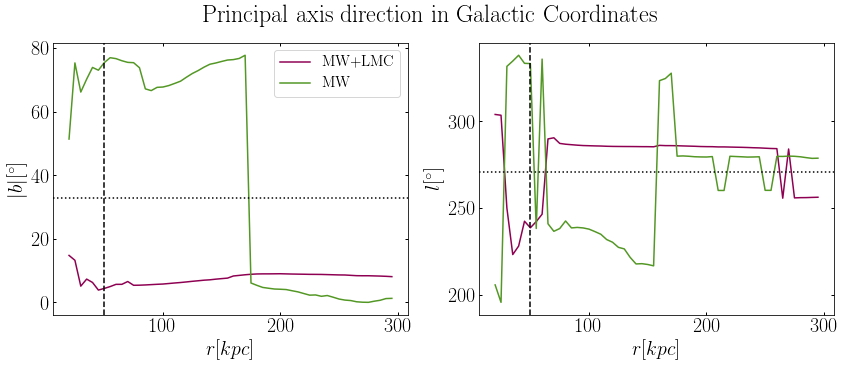

In [261]:
fig, ax = subplots(1, 2, figsize=(14, 5))
fig.suptitle('Principal axis direction in Galactic Coordinates')
ax[0].plot(r_s_mwlmc_all, np.abs(delta_b_mwlmc), c='#8e0152', label='MW+LMC')
ax[0].plot(r_s_mwlmc, np.abs(delta_b_mw), c='#539725', label='MW')
ax[0].legend(fontsize=15)
ax[0].set_xlabel('$r[kpc]$')
ax[0].set_ylabel(r'$|b|[^{\circ}]$')
ax[0].axvline(50, c='k', ls='--')
ax[0].axhline(33, c='k', ls=':')


ax[1].plot(r_s_mwlmc_all, (delta_l_mwlmc), c='#8e0152')
ax[1].plot(r_s_mwlmc, delta_l_mw, c='#539725')
ax[1].set_xlabel('$r[kpc]$')
ax[1].set_ylabel(r'$l[^{\circ}]$')
ax[1].axvline(50, c='k', ls='--')
ax[1].axhline(271, c='k', ls=':')
savefig('principal_axis_galactic.pdf')

# Discussion:

Prolate halos is expectes from radial mergers, whule oblate are expetec from tangential mergers
https://ui.adsabs.harvard.edu/abs/2019MNRAS.487..993D/abstract
    

In [81]:
# Fit ellipsoids to the SCF reconstructed density! See how good or bad are the fits.